K-means Clustering


In [1]:
# k-meas_project1
# 使用存檔於myfeature資料夾下的特徵矩陣
# Author: Yuan-Jen Chang, Feng Chia University, imCLOUD CO.,LTD.
# Date: Sep. 18 2024

# Importing the libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define directories
currentDirectory = '/content/drive/MyDrive/PHM_2024_Group6' # root Directory
healthyDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Healthy'
faulty1DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty1'
faulty2DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty2'
testingDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Testing'
csvDirectory='/content/drive/MyDrive/PHM_2024_Group6/csv'
featureDirectory='/content/drive/MyDrive/PHM_2024_Group6/myfeature'

In [4]:
# 讀取檔案
os.chdir(featureDirectory) # Change directory to feature file directory
dataset1 = pd.read_csv('featureHealthy.csv') # (48, 80)
dataset2 = pd.read_csv('featureFaulty.csv') # (96, 80)
#dataset2 = pd.read_csv('featureFaulty1.csv') # (48, 80)
#dataset2 = pd.read_csv('featureFaulty2.csv') # (48, 80)
dataset3 = pd.read_csv('featureTesting.csv')# (36, 80)
dataset4 = pd.read_csv('training_allFeature.csv')# (144, 80)

shape1=dataset1.shape
shape2=dataset2.shape
shape3=dataset3.shape
shape4=dataset4.shape

len1=shape1[1]  # Totally 80 features
m1=shape1[0] # m1 = 48 ; about Healthy
m2=shape2[0] # m2 = 96 ; about Faluty
m3=shape3[0] # m3 = 36 ; about Testing


feature_name=dataset1.columns.values.tolist() #取得特徵名稱

In [5]:
# m1 = 48
# m2 = 96
# len1 = 80
# 多故障分類之資料框順序: faulty1 -> faulty2 -> healthy

########## Get the healthy and faulty features from feature directory ##########

featureHealthy = dataset1.iloc[:, :].values  #Healthy features
featureFaulty = dataset2.iloc[:, :].values  #Faulty features
featureTesting = dataset3.iloc[:, :].values  #Faulty features

featureAll = np.zeros((m1+m2, len1), dtype=np.double) #(144, 80) # m1 = 48, m2 = 96
featureAll[0:m1,:]=featureHealthy[0:m1,:] #Healthy dataset = 48
featureAll[m1:m1+m2,:]=featureFaulty[0:96,:] #Faulty dataset = 96

# healthy label: 1
# faulty1 label: 2
# faulty2 label: 3

labelAll=np.zeros((m1+m2,1), dtype=np.double)  # 144 labels for training data

## Training data
labelAll[0:m1,0] =1  # Healthy label = 1; [0:48] assigned 1

labelAll[m1:m1+48,0] =2  # Faulty1 label  = 2 ; [48:96] assigned 2
labelAll[m1+48:m1+48*2,0] =3 # Faulty2 label  = 3; [96:144] assigned 3


X_train0 = featureAll[:,:] #Training set of X. The features: y-rms , v-mean
y_train = labelAll  #Training set of y. The labels

#  Test set
X_test0 = featureTesting[:,:] # The features:
y_test=np.zeros((m3,1), dtype=np.double) # m3 testing data
y_test[0:12,0] = 2  # Have known Faulty1 label = 2 (已知答案)
y_test[12:24,0] = 3  # Have known Faulty2 label = 3 (已知答案)
y_test[24:36,0] = 1  # Have known Healthy label = 1 (已知答案)


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # Standarderize all training data
X_train = sc.fit_transform(X_train0)
X_test = sc.transform(X_test0)

In [7]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


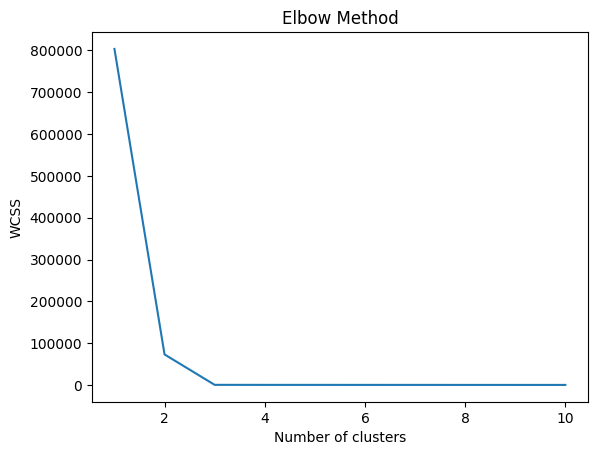

In [8]:
# Calculate WCSS
plt.figure()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
#plt.plot(2,wcss[1],'ro-')
#plt.plot(7,wcss[6],'rs-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

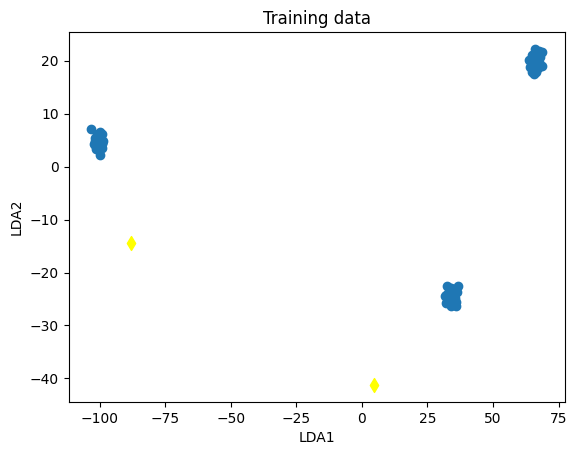

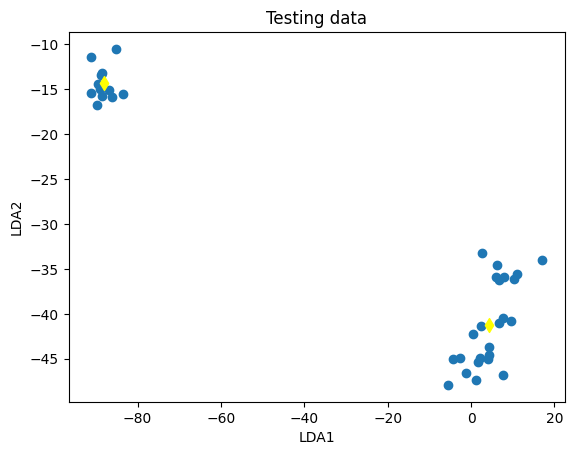

In [12]:
# K-Means
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train)
pred_y_test = kmeans.fit_predict(X_test)
#Plot training data
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='d', s=50, c='yellow')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('Training data')
plt.show()
#Plot testing data
plt.figure()
plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='d', s=50, c='yellow')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('Testing data')
plt.show()